<a href="https://colab.research.google.com/github/Daksh-Dhaker/Neural-Networks/blob/main/Noise_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


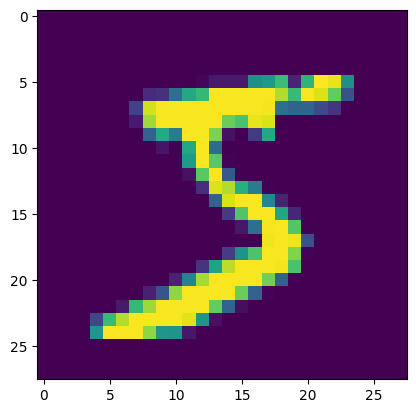

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
from tensorflow.keras.models import Sequential

In [7]:
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [8]:
encoder = Sequential()

encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation ='relu'))
encoder.add(Dense(200,activation ='relu'))
encoder.add(Dense(100,activation ='relu'))
encoder.add(Dense(50,activation ='relu'))
encoder.add(Dense(25,activation ='relu'))

In [9]:
decoder = Sequential()

decoder.add(Dense(50,activation ='relu',input_shape = [25]))
decoder.add(Dense(100,activation ='relu'))
decoder.add(Dense(200,activation ='relu'))
decoder.add(Dense(400,activation ='relu'))
decoder.add(Dense(784,activation ='sigmoid'))
decoder.add(Reshape([28,28]))

In [10]:
autoencoder = Sequential([encoder,decoder])

In [11]:
autoencoder.compile(loss ='binary_crossentropy',optimizer = SGD(learning_rate = 1.5),metrics = ['accuracy'])

In [12]:
autoencoder.fit(X_train,X_train,epochs =5,validation_data = [X_test,X_test])

Epoch 1/5
1875/1875 [==============================] - 21s 10ms/step - loss: 0.2524 - accuracy: 0.0904 - val_loss: 0.2079 - val_accuracy: 0.1413
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1811 - accuracy: 0.1680 - val_loss: 0.1597 - val_accuracy: 0.1901
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1551 - accuracy: 0.2010 - val_loss: 0.1472 - val_accuracy: 0.2097
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1457 - accuracy: 0.2157 - val_loss: 0.1415 - val_accuracy: 0.2168
Epoch 5/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1406 - accuracy: 0.2243 - val_loss: 0.1385 - val_accuracy: 0.2268


In [13]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 148ms/step


Original Image


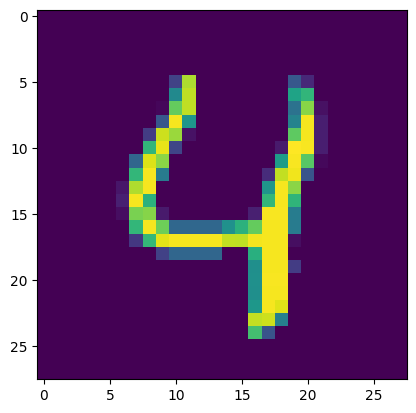

predicted image


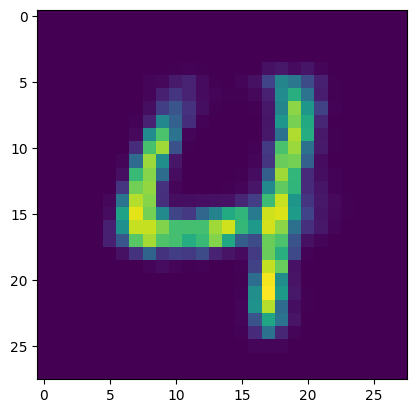

In [14]:
n = 4
print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("predicted image")
plt.imshow(passed_images[n])

In [15]:
# adding noise
from tensorflow.keras.layers import GaussianNoise
sample = GaussianNoise(0.2)

In [16]:
noisey = sample(X_test[:10],training = True)

original


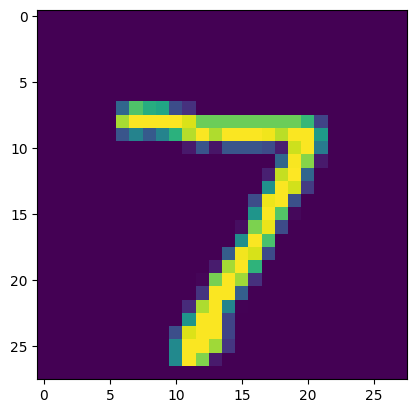

Noise version


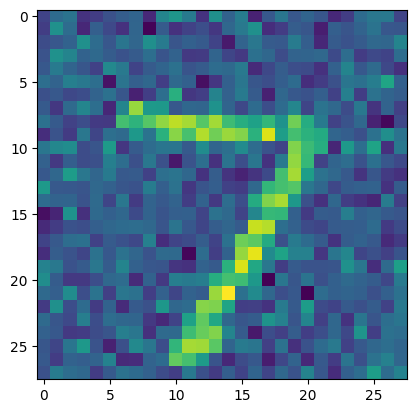

In [17]:
n =0
print("original")
plt.imshow(X_test[n])
plt.show()
print("Noise version")
plt.imshow(noisey[n])
plt.show()

In [18]:
import tensorflow as tf

In [19]:
encoder = Sequential()
tf.random.set_seed(101)
np.random.seed(101)
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation ='relu'))
encoder.add(Dense(200,activation ='relu'))
encoder.add(Dense(100,activation ='relu'))
encoder.add(Dense(50,activation ='relu'))
encoder.add(Dense(25,activation ='relu'))

In [20]:
decoder = Sequential()

decoder.add(Dense(50,activation ='relu',input_shape = [25]))
decoder.add(Dense(100,activation ='relu'))
decoder.add(Dense(200,activation ='relu'))
decoder.add(Dense(400,activation ='relu'))
decoder.add(Dense(784,activation ='sigmoid'))
decoder.add(Reshape([28,28]))

In [21]:
noise_remover = Sequential([encoder,decoder])

In [22]:
noise_remover.compile(optimizer ='adam',loss ='binary_crossentropy',metrics =['accuracy'])

In [23]:
noise_remover.fit(X_train,X_train,epochs = 8)

Epoch 1/8
1875/1875 [==============================] - 30s 15ms/step - loss: 0.1713 - accuracy: 0.1813
Epoch 2/8
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1311 - accuracy: 0.2336
Epoch 3/8
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1203 - accuracy: 0.2488
Epoch 4/8
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1143 - accuracy: 0.2576
Epoch 5/8
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1112 - accuracy: 0.2629
Epoch 6/8
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1091 - accuracy: 0.2670
Epoch 7/8
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1076 - accuracy: 0.2701
Epoch 8/8
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1059 - accuracy: 0.2730


In [24]:
ten_noisey_images = sample(X_test[:10],training = True)

In [25]:
denoised_images = noise_remover(ten_noisey_images)

original


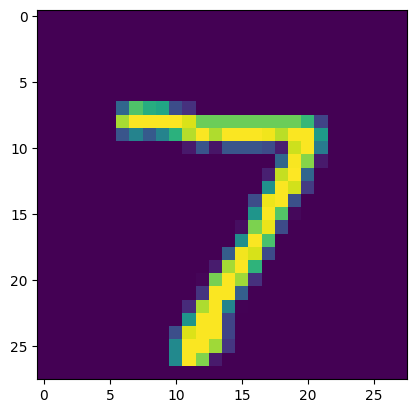

Noise Added Image


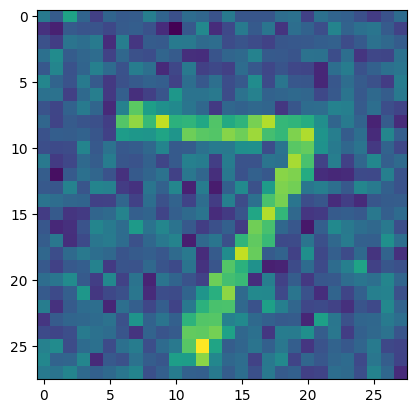

after noise removal


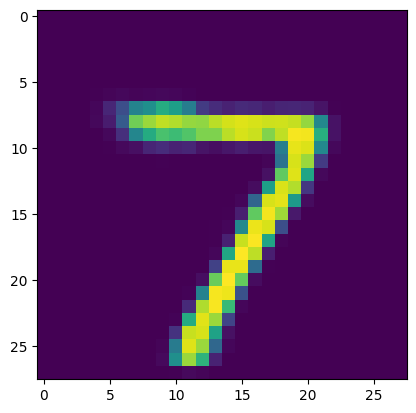

In [28]:
print("original")
plt.imshow(X_test[n])
plt.show()
print("Noise Added Image")
plt.imshow(ten_noisey_images[n])
plt.show()
print("after noise removal")
plt.imshow(denoised_images[n])
plt.show()